# Network Metrics and Visualization

### DATA 620: Web Analytics - Project 2
### Team 3 -  Rafal Decowski, Tze Fung Lung, Yun Mai, Ahsanul Chouhary


In [13]:
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import colors as mcolors

plt.rcParams['figure.figsize'] = [14, 12]

## Data 
The dataset contains 513 relationship records for around 65 unique Harry Potter characters.

In [2]:
#Read the data into a pandas data frame:
ga_edges = pd.read_csv('https://raw.githubusercontent.com/rafaldecowski/DATA620/master/hw2/hp_relationships.csv')
ga_edges = ga_edges.drop('Unnamed: 0', axis=1)
display(ga_edges.head())

,source,target
0,Regulus Arcturus Black,Sirius Black
1,Albus Dumbledore,Sirius Black
2,Argus Filch,Sirius Black
3,Bellatrix Lestrange,Sirius Black
4,Remus Lupin,Sirius Black


In [3]:
display(ga_edges.describe())

,source,target
count,513,513
unique,65,61
top,Albus Dumbledore,Harry Potter
freq,36,47


## Data Cleansing

There are 3 rows which have the same characters listed as source and target. These records will be removed.

In [4]:
# Number of self referential edges
print(sum(ga_edges["source"] == ga_edges["target"]))
print()
print(ga_edges.loc[(ga_edges["source"] == ga_edges["target"])].head())

3

              source           target
442  Petunia Dursley  Petunia Dursley
481   Dudley Dursley   Dudley Dursley
509   Tom Riddle Sr.   Tom Riddle Sr.


In [5]:
# Deleting the self referential edges from the data frame
ga_edges = ga_edges.loc[~(ga_edges["source"] == ga_edges["target"])]

## Building a Graph

In [6]:
# Building a graph directly from pandas data frame:
g = nx.DiGraph()
g = nx.from_pandas_edgelist(ga_edges, source='source', target='target', edge_attr=True)

In [7]:
print(nx.info(g))

Name: 
Type: Graph
Number of nodes: 65
Number of edges: 330
Average degree:  10.1538


# Centrality Measures 

#### Degree, Degree Centrality and Closeness Centrality

In [8]:
# Compute degree for nodes.
degree = dict(nx.degree(g))

# Compute the degree centrality for nodes.
degree_centrality = dict(nx.degree_centrality(g))

# Compute closeness centrality for nodes.
closeness_centrality = dict(nx.closeness_centrality(g))

In [9]:
# Complite results into a dataframe
d_df = pd.DataFrame(data={'degree': list(degree.values()),
                          'degree_centrality': list(degree_centrality.values()),
                          'closeness_centrality': list(closeness_centrality.values())})

# Add character names as index
d_df.index = degree.keys()

# Print 10 most important people by centrality measures
round(d_df.sort_values('closeness_centrality', ascending=False).head(10),2)

,closeness_centrality,degree,degree_centrality
Harry Potter,0.80,48,0.75
Ron Weasley,0.70,37,0.58
Hermione Granger,0.70,36,0.56
Lord Voldemort,0.69,36,0.56
Albus Dumbledore,0.65,32,0.50
Sirius Black,0.59,23,0.36
Ginny Weasley,0.57,18,0.28
Molly Weasley,0.57,17,0.27
George Weasley,0.57,17,0.27
Fred Weasley,0.57,17,0.27


### Degree Graph

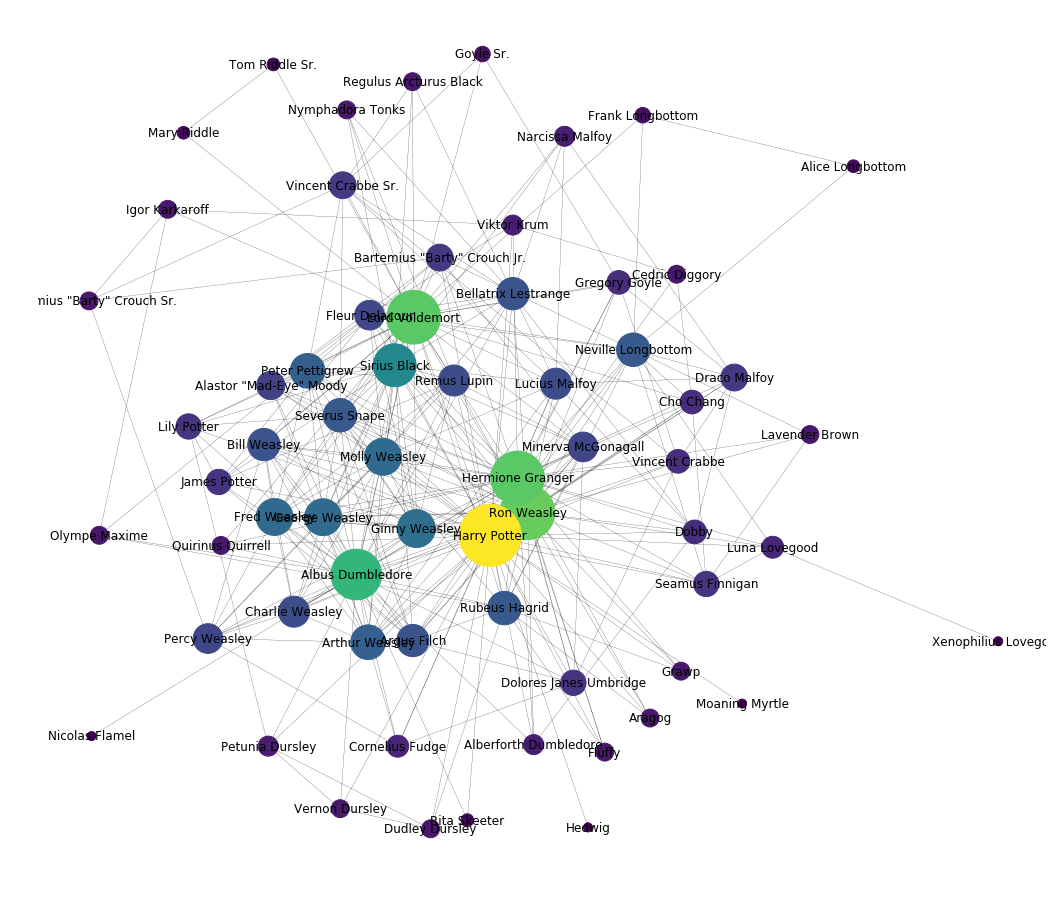

In [14]:
# Draw degree valus as color and size (hand selected multiplier for better visualization)
degree_graph = nx.draw_kamada_kawai(g, 
                                    with_labels=True, 
                                    node_color=list(degree.values()), 
                                    node_size=[v * 80 for v in degree.values()], 
                                    width=0.2)

# Distance Measures

### Diameter & Eccentricity Measures

The diameter is the maximum eccentricity. The eccentricity of a node v is the maximum distance from v to all other nodes in G.


In [11]:
# The diameter is the maximum eccentricity. 
diameter = nx.diameter(g)

# The eccentricity of a node v is the maximum distance from v to all other nodes in G.
eccentricity = nx.eccentricity(g)
dict(list(eccentricity.items())[0:10])

{'Albus Dumbledore': 3,
 'Argus Filch': 3,
 'Arthur Weasley': 3,
 'Bellatrix Lestrange': 3,
 'James Potter': 3,
 'Peter Pettigrew': 3,
 'Regulus Arcturus Black': 4,
 'Remus Lupin': 3,
 'Ron Weasley': 2,
 'Sirius Black': 3}

### Eccentricity Graph

It beautifully and accurately outlines 3 groups of relationships

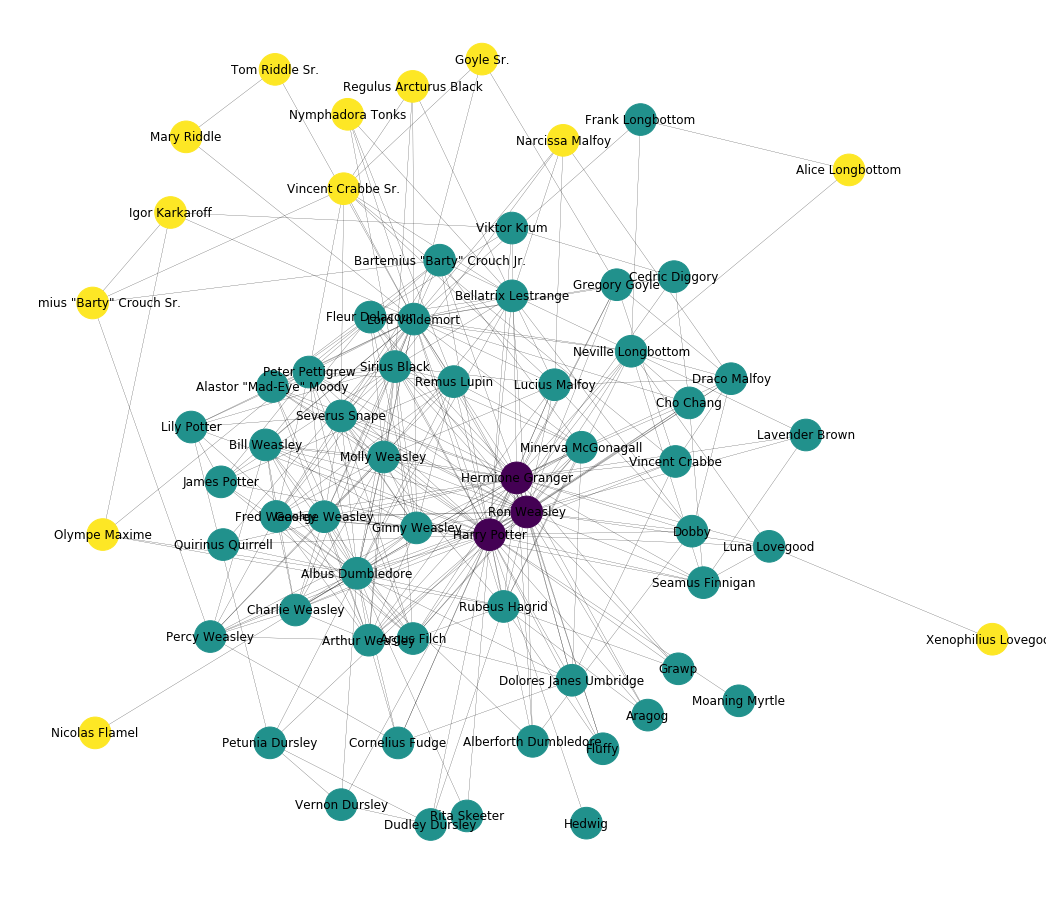

In [15]:
eccentricity_graph = nx.draw_kamada_kawai(g, 
                                    with_labels=True, 
                                    node_color=list(eccentricity.values()), 
                                    node_size=1000, 
                                    width=0.2)